**Porocilo**

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sns
import numpy as np
import scipy.stats as stats

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


df_homicides = pd.read_csv(".\\files\\USA_homicides\\USA_homicides_processed.csv")
df_guns = pd.read_csv('.\\files\\guns_per_capita.csv', header=0)
df_population = pd.read_csv(".\\files\\us_population_2019.csv")


Total number of murders for each state

Shown with a bar plot

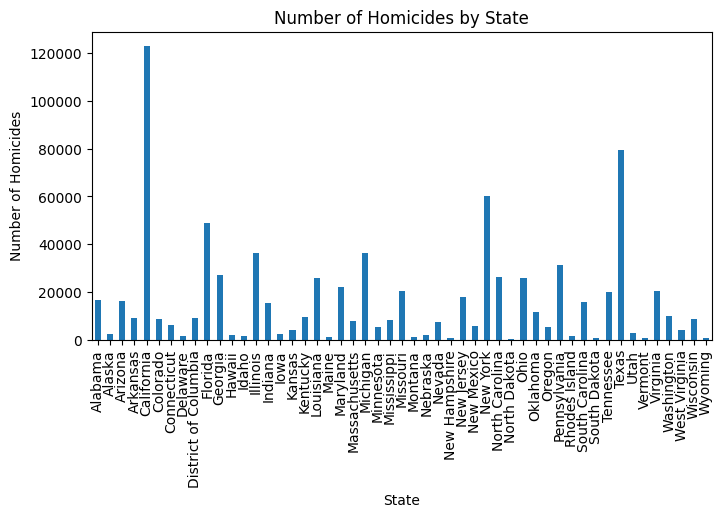

In [2]:
murders_by_state = df_homicides.groupby("State")["ID"].count()
murders_by_state.drop("PAPSP8", inplace=True)

murders_by_state.plot(kind="bar", figsize=(8,4))
plt.title("Number of Homicides by State")
plt.xlabel("State")
plt.ylabel("Number of Homicides")
plt.show()

Shown with a map of the USA states

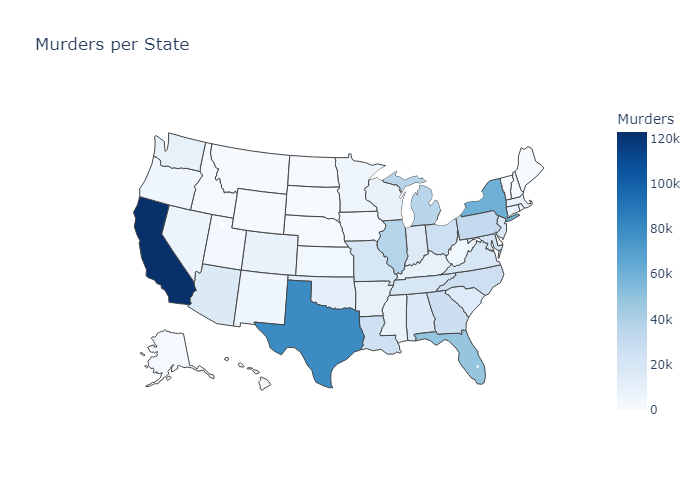

In [3]:
murders_by_state = df_homicides.groupby("State")["ID"].count().reset_index()
murders_by_state.columns = ["State", "Murders"]

state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID', 'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhodes Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

murders_by_state['State'] = murders_by_state['State'].replace(state_abbr)

fig = px.choropleth(murders_by_state, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='Murders',
                    scope="usa",
                    color_continuous_scale='Blues',
                    range_color=(0, murders_by_state['Murders'].max()),
                    title='Murders per State')

fig.write_image("map_bez_na_glava_zitel.png")
Image(filename='map_bez_na_glava_zitel.png')


Total number of murders for each state per capita (100.000 people)

Shown with a bar plot

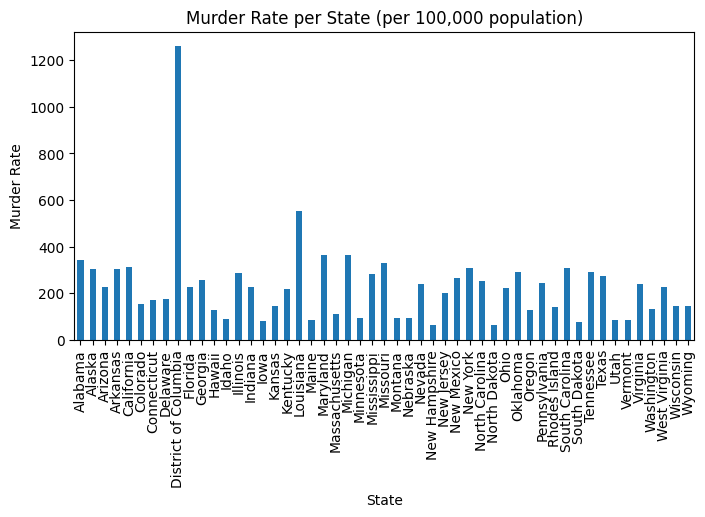

In [4]:
population_by_state = df_population.set_index("State")["Population"]

murders_by_state = df_homicides.groupby("State")["ID"].count()
murders_by_state.drop("PAPSP8", inplace=True)
murder_rate_by_state = murders_by_state / population_by_state * 100000


plt.figure(figsize=(8,4))
murder_rate_by_state.plot(kind="bar")
plt.title("Murder Rate per State (per 100,000 population)")
plt.xlabel("State")
plt.ylabel("Murder Rate")
plt.show()

Shown with a map of the USA states

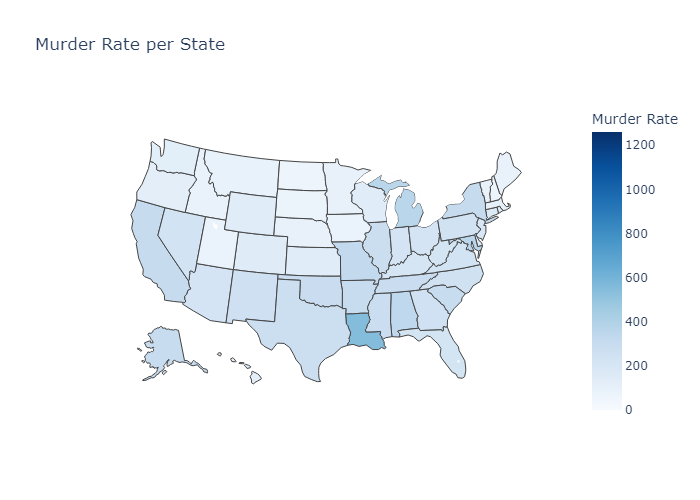

In [5]:
murders_by_state = df_homicides.groupby("State")["ID"].count().reset_index()
murders_by_state.columns = ["State", "Murders"]

merged_df = pd.merge(murders_by_state, df_population, on='State')
merged_df['Murder Rate'] = merged_df['Murders'] / merged_df['Population'] * 100000

state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID', 'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhodes Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

merged_df['State'] = merged_df['State'].replace(state_abbr)

fig = px.choropleth(merged_df, 
                    locations='State', 
                    locationmode="USA-states", 
                    color='Murder Rate',
                    scope="usa",
                    color_continuous_scale='Blues',
                    range_color=(0, merged_df['Murder Rate'].max()),
                    title='Murder Rate per State')

fig.write_image("map_na_glava_zitel.png")
Image(filename='map_na_glava_zitel.png')


**Zadaca 2**



What are the most common types of homocides? 

What weapon is the most commonly used?

Does gun ownership influence the the number of homocides / shootings?

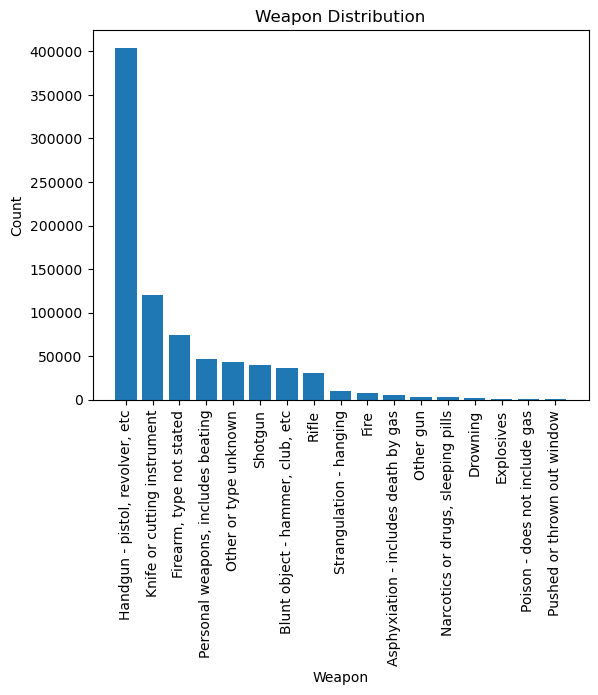

In [2]:
df_homicides['Weapon'].describe(include='object')

weapon_usage = df_homicides["Weapon"].value_counts()

plt.bar(weapon_usage.index, weapon_usage.values)
plt.xticks(rotation=90)
plt.xlabel("Weapon")
plt.ylabel("Count")
plt.title("Weapon Distribution")
plt.show()


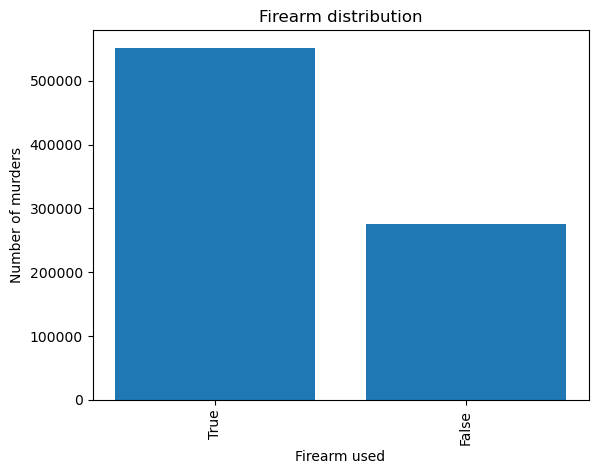

In [3]:
firearms = ['Shotgun', 'Handgun - pistol, revolver, etc', 'Rifle', 'Firearm, type not stated', 'Other gun']
df_homicides['Firearm used'] = df_homicides['Weapon'].apply(lambda x: True if x in firearms else False)

situations = df_homicides["Firearm used"].value_counts()
plt.bar(situations.index.astype(str), situations.values)
plt.xticks(rotation=90)
plt.xlabel("Firearm used")
plt.ylabel("Number of murders")
plt.title("Firearm distribution")
plt.show()

Top 5 relationships and reasons for murder (excluding "unknown" as the most popular one)

Does gun ownership influence homocides

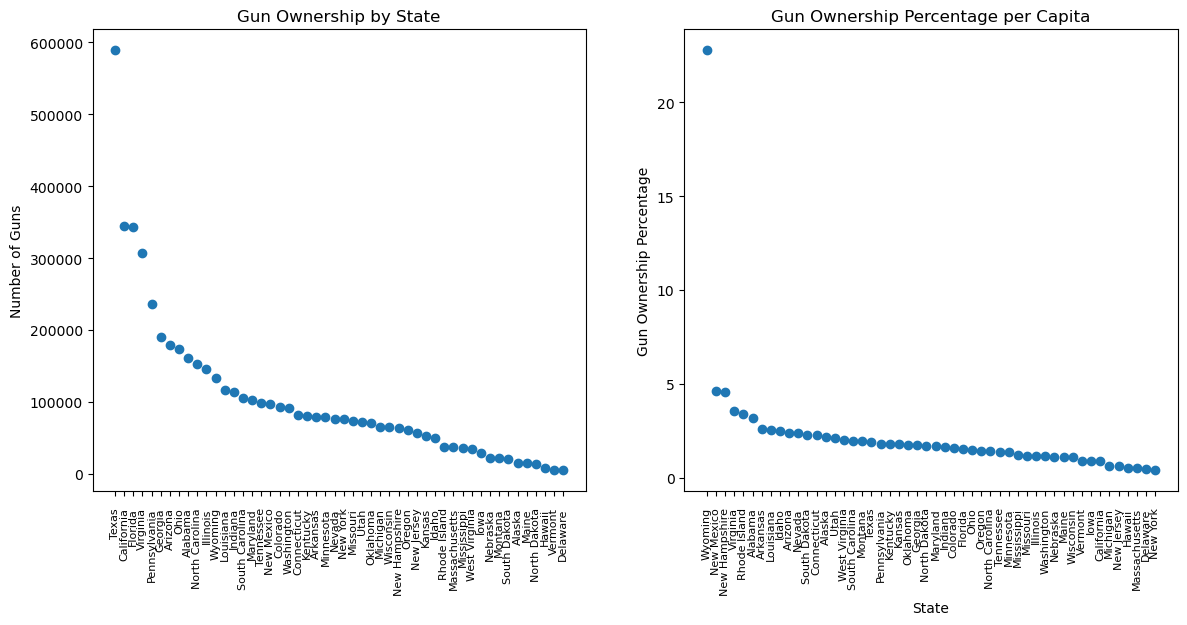

In [4]:
df_guns_sorted = df_guns.sort_values(by="pop2023", ascending=False)
df_guns_sorted["gun_ownership"] = df_guns_sorted["gunsRegistered"] / df_guns_sorted["pop2023"] * 100
guns_precentage = df_guns_sorted.sort_values(by="gun_ownership", ascending=False).head(50)
guns_per_state = df_guns.groupby("state")["gunsRegistered"].sum().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Gun Ownership by State
axs[0].scatter(guns_per_state.index, guns_per_state)
axs[0].set_xticks(guns_per_state.index)
axs[0].set_xticklabels(guns_per_state.index, rotation=90)
axs[0].set_ylabel("Number of Guns")
axs[0].set_title("Gun Ownership by State")
axs[0].tick_params(axis='x', labelsize=8, pad=8)

# Scatter plot for Gun Ownership Percentage per Capita
axs[1].scatter(guns_precentage["state"], guns_precentage['gun_ownership'])
axs[1].set_xticks(df_guns["state"])
axs[1].set_xticklabels(df_guns["state"], rotation=90)
axs[1].set_xlabel("State")
axs[1].set_ylabel("Gun Ownership Percentage")
axs[1].set_title("Gun Ownership Percentage per Capita")
axs[1].tick_params(axis='x', labelsize=8, pad=8)

plt.savefig("scatter_plots.png")
plt.show()

In [9]:
homocides_per_capita = (df_homicides.groupby("State")["ID"].count() / df_guns.set_index("state")["pop2023"]) * 100000
homocides_per_capita = homocides_per_capita.sort_values(ascending=False).head(50)
common_states = set(guns_precentage["state"]).intersection(set(homocides_per_capita.index))
gun_ownership_per_capita = guns_precentage[guns_precentage["state"].isin(common_states)]['gun_ownership']
homicides_per_capita = homocides_per_capita[homocides_per_capita.index.isin(common_states)]
gun_ownership_per_capita = np.array(gun_ownership_per_capita)
homicides_per_capita = np.array(homicides_per_capita)
correlation_coefficient = np.corrcoef(gun_ownership_per_capita, homicides_per_capita)[0, 1]
print(correlation_coefficient)

0.7109630367945233


Texas, California, Florida, Ohio, North Carolina -> In most guns and most homocides

Once we break up the data per capita (based on population size), only Alabama, Arkansas and Louisiana are in top 10 on both graphs

**Zadaca 3**

The race, age, and gender of the offender

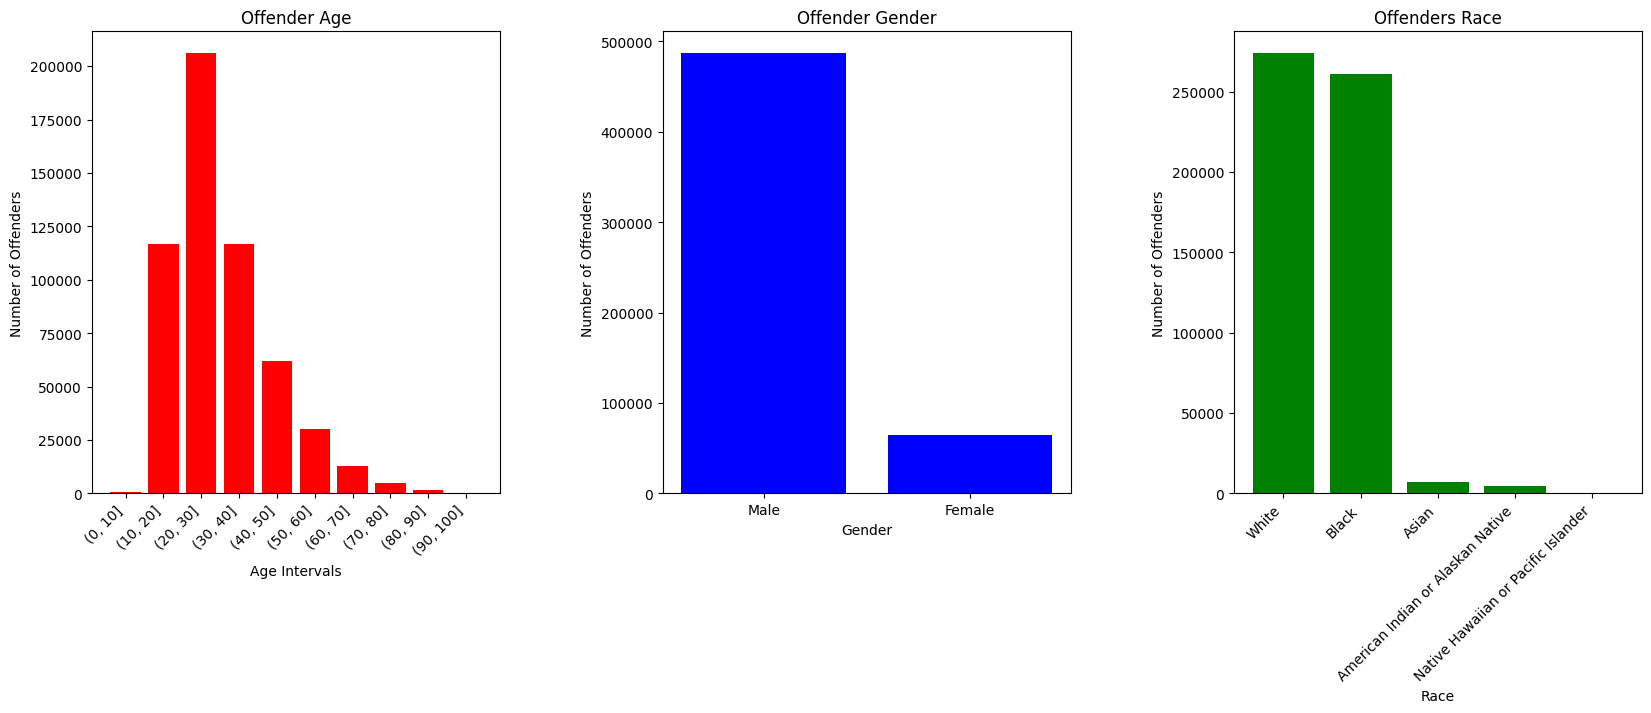

In [10]:
df_homicides = pd.read_csv(".\\files\\USA_homicides\\USA_homicides_processed.csv")
df_homicides = df_homicides[df_homicides['OffAge'] != 999]
age_intervals = pd.cut(df_homicides['OffAge'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_counts = age_intervals.value_counts(sort=False)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].bar(age_counts.index.astype(str), age_counts.values, color='r')
axs[0].set_title('Offender Age')
axs[0].set_xlabel('Age Intervals')
axs[0].set_ylabel('Number of Offenders')
axs[0].set_xticklabels(age_counts.index.astype(str), rotation=45, ha='right')

offender_gender = df_homicides['OffSex']
df_filtered_gender = df_homicides.loc[df_homicides['OffSex'] != 'Unknown']
gender_counts = df_filtered_gender['OffSex'].value_counts()
axs[1].bar(gender_counts.index, gender_counts.values, color='b')
axs[1].set_title('Offender Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Offenders')

df_filtered = df_homicides.loc[df_homicides['OffRace'] != 'Unknown']
race_counts = df_filtered['OffRace'].value_counts()
axs[2].bar(race_counts.index, race_counts.values, color='g')
axs[2].set_title('Offenders Race')
axs[2].set_xlabel('Race')
axs[2].set_ylabel('Number of Offenders')
axs[2].set_xticklabels(race_counts.index, rotation=45, ha='right')

plt.subplots_adjust(wspace=0.4)
plt.savefig("karakteristike_morilca.png")
plt.show()


**Zadaca 4**

The race, age, and gender of the victims

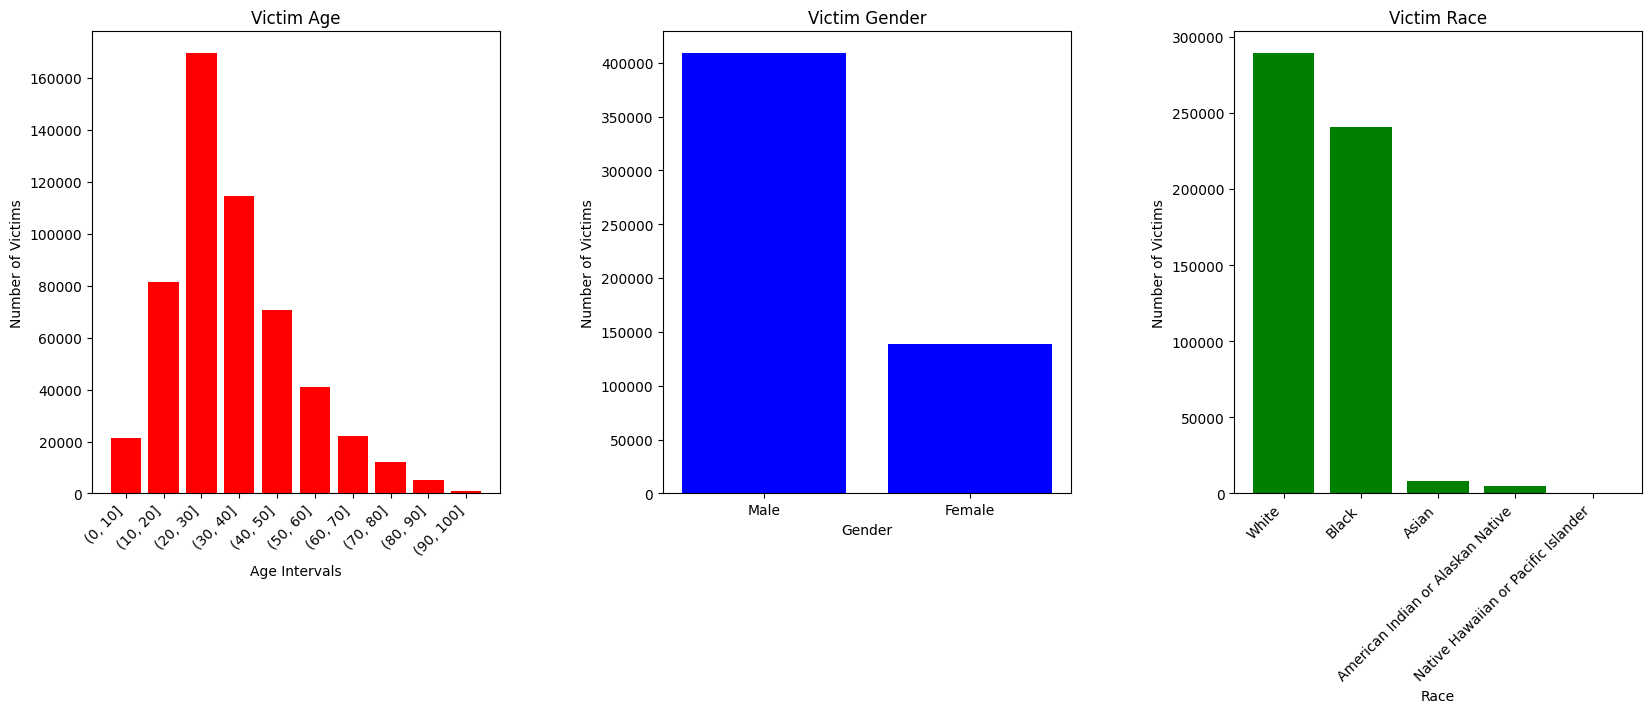

In [11]:
df_homicides = df_homicides[df_homicides['VicAge'] != 999]
age_intervals = pd.cut(df_homicides['VicAge'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_counts = age_intervals.value_counts(sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].bar(age_counts.index.astype(str), age_counts.values, color='r')
axs[0].set_title('Victim Age')
axs[0].set_xlabel('Age Intervals')
axs[0].set_ylabel('Number of Victims')
axs[0].set_xticklabels(age_counts.index.astype(str), rotation=45, ha='right')

victim_gender = df_homicides['VicSex']
df_filtered_gender = df_homicides.loc[df_homicides['VicSex'] != 'Unknown']
gender_counts = df_filtered_gender['VicSex'].value_counts()
axs[1].bar(gender_counts.index, gender_counts.values, color='b')
axs[1].set_title('Victim Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Victims')

df_filtered = df_homicides.loc[df_homicides['VicRace'] != 'Unknown']
race_counts = df_filtered['VicRace'].value_counts()
axs[2].bar(race_counts.index, race_counts.values, color='g')
axs[2].set_title('Victim Race')
axs[2].set_xlabel('Race')
axs[2].set_ylabel('Number of Victims')
axs[2].set_xticklabels(race_counts.index, rotation=45, ha='right')

plt.subplots_adjust(wspace=0.4)
plt.savefig("karakteristike_zrtev.png")
plt.show()

**zadaca 5**

circumstance

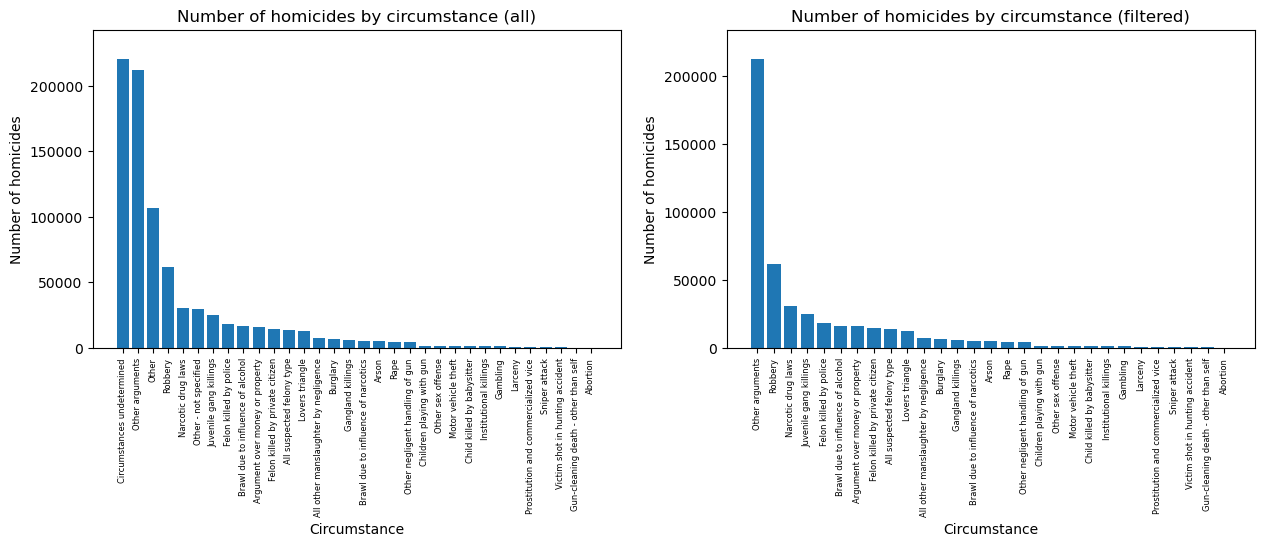

In [3]:
df_homicides = pd.read_csv(".\\files\\USA_homicides\\USA_homicides_processed.csv")
circumstance_counts_all = df_homicides.groupby('Circumstance')['Homicide'].count().sort_values(ascending=False)
circumstance_counts_filtered = circumstance_counts_all.drop(['Other', 'Other - not specified', 'Circumstances undetermined'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axs[0].bar(circumstance_counts_all.index, circumstance_counts_all.values)
axs[0].set_xticklabels(circumstance_counts_all.index, rotation=90, fontsize=6)
axs[0].set_xlabel('Circumstance')
axs[0].set_ylabel('Number of homicides')
axs[0].set_title('Number of homicides by circumstance (all)')
axs[0].set_ylim([0, max(circumstance_counts_all.values) * 1.1])

axs[1].bar(circumstance_counts_filtered.index, circumstance_counts_filtered.values)
axs[1].set_xticklabels(circumstance_counts_filtered.index, rotation=90, fontsize=6)
axs[1].set_xlabel('Circumstance')
axs[1].set_ylabel('Number of homicides')
axs[1].set_title('Number of homicides by circumstance (filtered)')
axs[1].set_ylim([0, max(circumstance_counts_filtered.values) * 1.1])

plt.subplots_adjust(bottom=0.35)
plt.show()

relationship

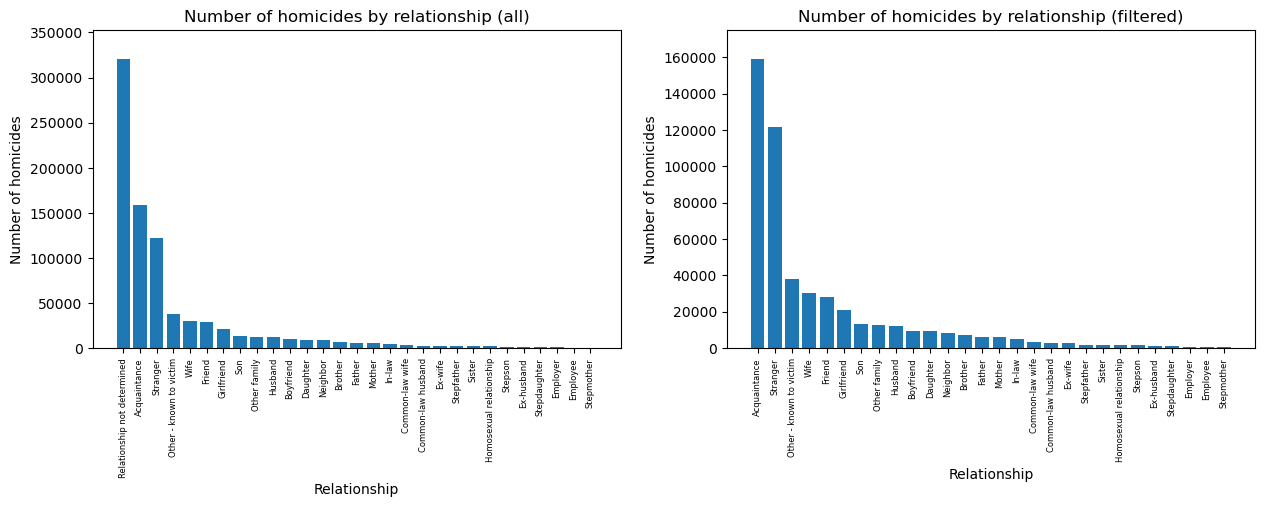

In [4]:
relationship_counts = df_homicides.groupby('Relationship')['Homicide'].count().sort_values(ascending=False)
relationship_counts_filtered = relationship_counts.drop(['Relationship not determined'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axs[0].bar(relationship_counts.index, relationship_counts.values)
axs[0].set_xticklabels(relationship_counts.index, rotation=90, fontsize=6)
axs[0].set_xlabel('Relationship')
axs[0].set_ylabel('Number of homicides')
axs[0].set_title('Number of homicides by relationship (all)')
axs[0].set_ylim([0, max(relationship_counts.values) * 1.1])

axs[1].bar(relationship_counts_filtered.index, relationship_counts_filtered.values)
axs[1].set_xticklabels(relationship_counts_filtered.index, rotation=90, fontsize=6)
axs[1].set_xlabel('Relationship')
axs[1].set_ylabel('Number of homicides')
axs[1].set_title('Number of homicides by relationship (filtered)')
axs[1].set_ylim([0, max(relationship_counts_filtered.values) * 1.1])

plt.subplots_adjust(bottom=0.35)
plt.show()

plus

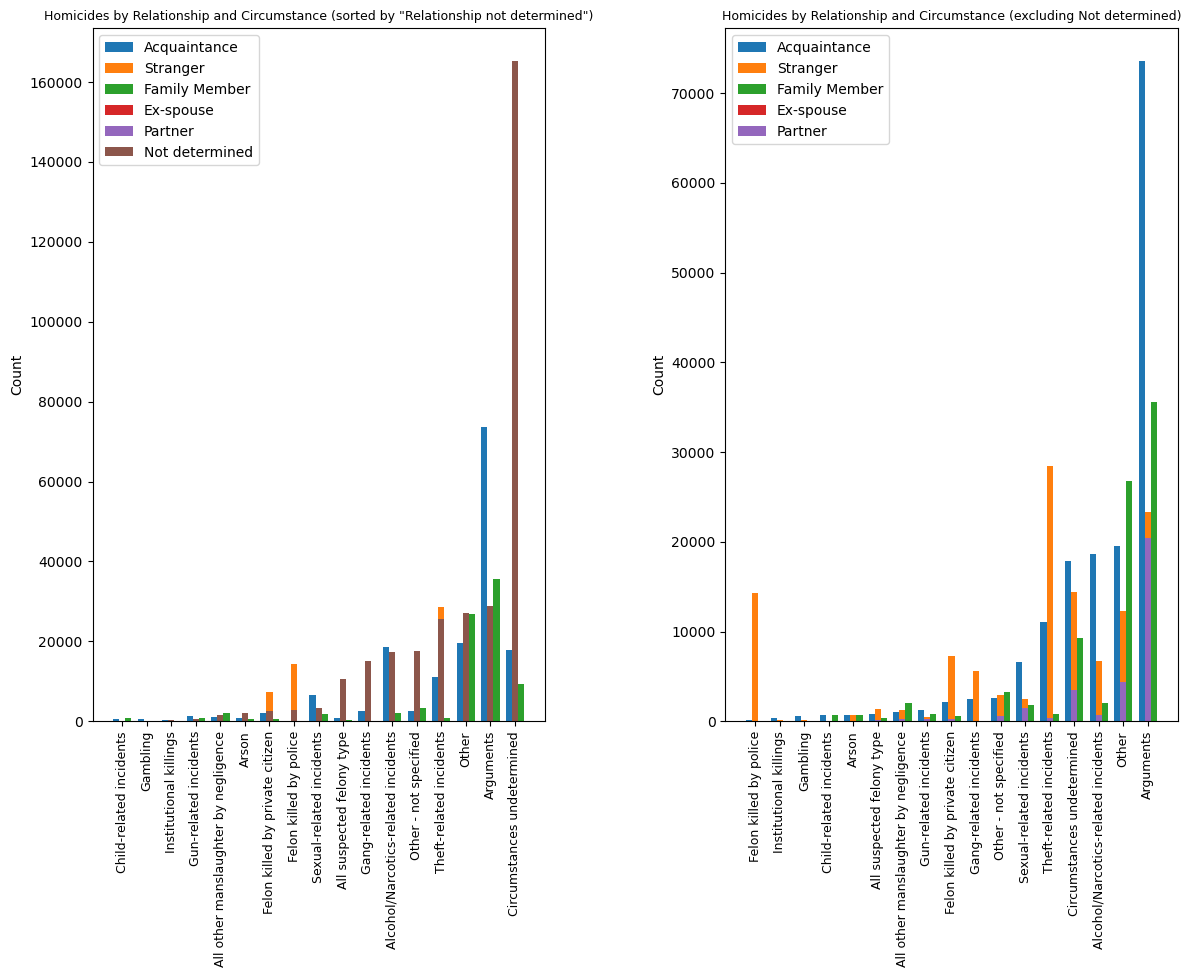

In [9]:
df_homicides['Circumstances'] = np.where(df_homicides['Circumstance'].isin(['Abortion', 'Child killed by babysitter', 'Children playing with gun']), 'Child-related incidents', df_homicides['Circumstance'])
df_homicides['Circumstances'] = np.where(df_homicides['Circumstances'].isin(['Gun-cleaning death - other than self', 'Sniper attack', 'Victim shot in hunting accident','Other negligent handling of gun']), 'Gun-related incidents', df_homicides['Circumstances'])
df_homicides['Circumstances'] = np.where(df_homicides['Circumstances'].isin(['Prostitution and commercialized vice', 'Other sex offense', 'Lovers triangle','Rape',]), 'Sexual-related incidents', df_homicides['Circumstances'])
df_homicides['Circumstances'] = np.where(df_homicides['Circumstances'].isin(['Gangland killings', 'Juvenile gang killings']), 'Gang-related incidents', df_homicides['Circumstances'])
df_homicides['Circumstances'] = np.where(df_homicides['Circumstances'].isin(['Larceny', 'Motor vehicle theft', 'Burglary','Robbery']), 'Theft-related incidents', df_homicides['Circumstances'])
df_homicides['Circumstances'] = np.where(df_homicides['Circumstances'].isin(['Brawl due to influence of narcotics', 'Narcotic drug laws', 'Brawl due to influence of alcohol']), 'Alcohol/Narcotics-related incidents', df_homicides['Circumstances'])
df_homicides['Circumstances'] = np.where(df_homicides['Circumstances'].isin(['Argument over money or property','Other arguments']), 'Arguments', df_homicides['Circumstances'])
circumstance_relationship_count = df_homicides.groupby(['Circumstances', 'Relationship'])['Relationship'].count().unstack()
circumstance_relationship_count['Family_member'] = circumstance_relationship_count[['Brother', 'Sister','Common-law husband','Common-law wife', 'Daughter', 'Other family','Son', 'Stepdaughter','Stepfather','Stepmother','Stepson','Wife']].sum(axis=1)
circumstance_relationship_count['Acquaintance'] = circumstance_relationship_count[['Acquaintance', 'Employee', 'Employer']].sum(axis=1)
circumstance_relationship_count['Ex-spouse'] = circumstance_relationship_count[['Ex-wife', 'Ex-husband']].sum(axis=1)
circumstance_relationship_count['Partner'] = circumstance_relationship_count[['Boyfriend', 'Girlfriend', 'Homosexual relationship']].sum(axis=1)

labels = circumstance_relationship_count.index
x = np.arange(len(labels))
width = 0.25

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 9))
fig.subplots_adjust(wspace=0.4)

sorted_circumstance_relationship_count = circumstance_relationship_count.sort_values('Relationship not determined')

labels = sorted_circumstance_relationship_count.index

rects1 = ax1.bar(x - width, sorted_circumstance_relationship_count['Acquaintance'], width, label='Acquaintance')
rects2 = ax1.bar(x, sorted_circumstance_relationship_count['Stranger'], width, label='Stranger')
rects3 = ax1.bar(x + width, sorted_circumstance_relationship_count['Family_member'], width, label='Family Member')
rects4 = ax1.bar(x, sorted_circumstance_relationship_count['Ex-spouse'], width, label='Ex-spouse')
rects5 = ax1.bar(x, sorted_circumstance_relationship_count['Partner'], width, label='Partner')
rects6 = ax1.bar(x, sorted_circumstance_relationship_count['Relationship not determined'], width, label='Not determined')
ax1.set_ylabel('Count')
ax1.set_title('Homicides by Relationship and Circumstance (sorted by "Relationship not determined")', fontsize=9)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90, fontsize=9)
ax1.legend()

sorted_circumstance_relationship_count = circumstance_relationship_count.sort_values('Acquaintance')

labels = sorted_circumstance_relationship_count.index

rects1 = ax2.bar(x - width, sorted_circumstance_relationship_count['Acquaintance'], width, label='Acquaintance')
rects2 = ax2.bar(x, sorted_circumstance_relationship_count['Stranger'], width, label='Stranger')
rects3 = ax2.bar(x + width, sorted_circumstance_relationship_count['Family_member'], width, label='Family Member')
rects4 = ax2.bar(x, sorted_circumstance_relationship_count['Ex-spouse'], width, label='Ex-spouse')
rects5 = ax2.bar(x, sorted_circumstance_relationship_count['Partner'], width, label='Partner')
ax2.set_ylabel('Count')
ax2.set_title('Homicides by Relationship and Circumstance (excluding Not determined)', fontsize=9)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=90,fontsize=9)
ax2.legend()
plt.savefig("relationship+circumstance.png")
plt.show()

Zadaca 6

Kolku od cases-ot se solved a kolku ne se?

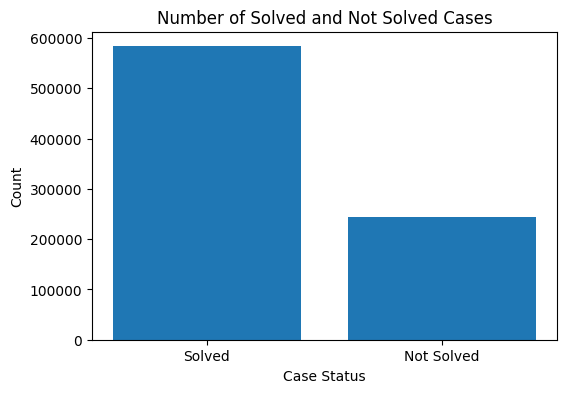

In [15]:
df_homicides = pd.read_csv(".\\files\\USA_homicides\\USA_homicides_processed.csv")
solved_counts = df_homicides['Solved'].value_counts().get('Yes', 0)
not_solved_counts = df_homicides['Solved'].value_counts().get('No', 0)

plt.figure(figsize=(6, 4))
plt.bar(['Solved', 'Not Solved'], [solved_counts, not_solved_counts])
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.title('Number of Solved and Not Solved Cases')
plt.show()

Za site vidovi na agencii sto rabotele na slucaevite se preborjuva na kolku slucaevi rabotele

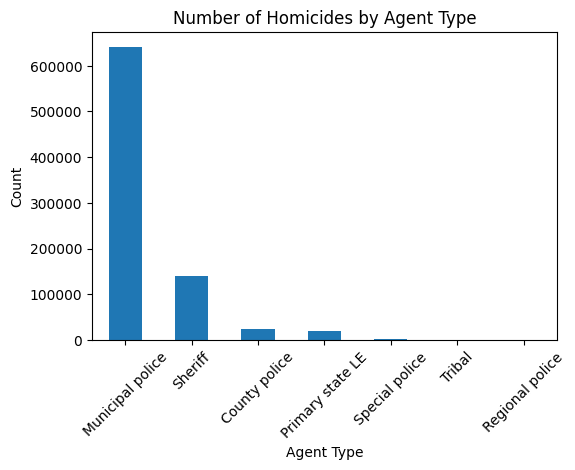

In [16]:
df_homicides_smeneto = df_homicides[df_homicides['Agentype'] != '4']
agent_type_counts = df_homicides_smeneto['Agentype'].value_counts()

plt.figure(figsize=(6, 4))
agent_type_counts.plot(kind='bar')
plt.xlabel('Agent Type')
plt.ylabel('Count')
plt.title('Number of Homicides by Agent Type')
plt.xticks(rotation=45)
plt.show()

Kolku od tie slucaevi se razreseni

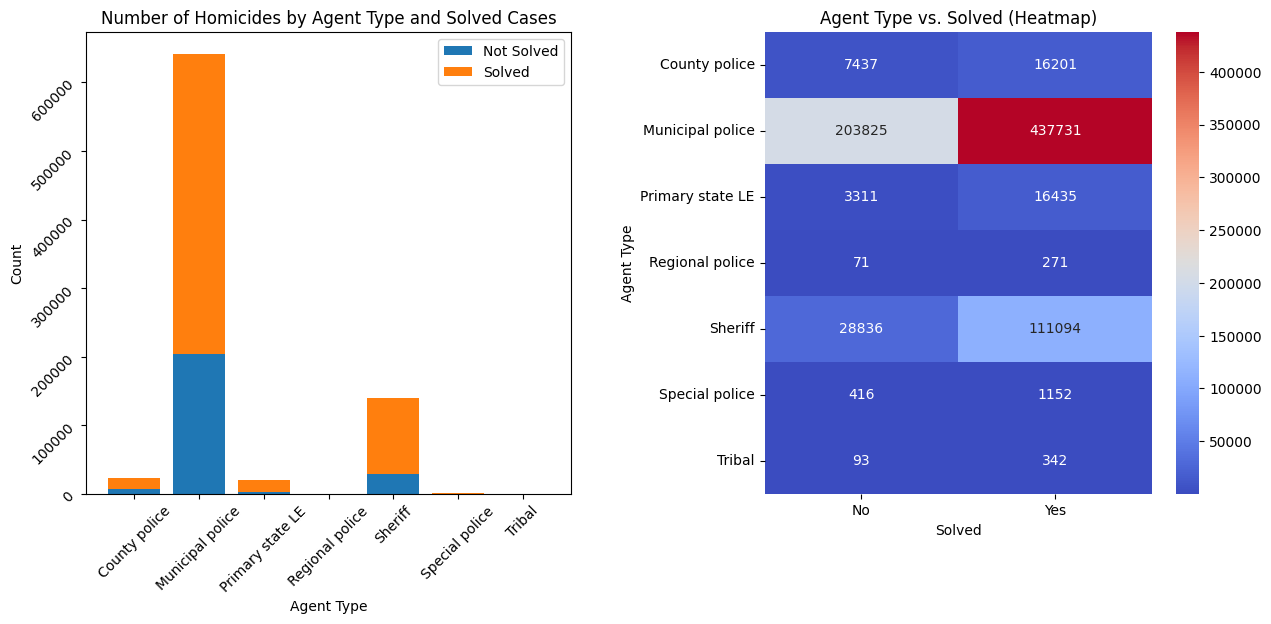

In [17]:
agent_types = df_homicides['Agentype'].unique()
agent_type_counts = df_homicides_smeneto['Agentype'].value_counts()
agent_type_stats = df_homicides_smeneto.groupby(['Agentype', 'Solved']).size().unstack().reset_index()
contingency_table = pd.crosstab(df_homicides_smeneto['Agentype'], df_homicides_smeneto['Solved'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(agent_type_stats['Agentype'], agent_type_stats['No'], label='Not Solved')
axes[0].bar(agent_type_stats['Agentype'], agent_type_stats['Yes'], bottom=agent_type_stats['No'], label='Solved')
axes[0].set_xlabel('Agent Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Homicides by Agent Type and Solved Cases')
axes[0].legend()
axes[0].tick_params(rotation=45)

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
axes[1].set_title('Agent Type vs. Solved (Heatmap)')
axes[1].set_xlabel('Solved')
axes[1].set_ylabel('Agent Type')
plt.subplots_adjust(wspace=0.4) 

plt.savefig("agency.png")
plt.show()

Da se presmeta dali ima korelacija pomegu agencijata i dali slucajot bil razresen

In [18]:
contingency_table = pd.crosstab(df_homicides_smeneto['Agentype'], df_homicides_smeneto['Solved'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Squared test statistics: ", chi2)
print("P-value: ", p_val)

Chi-Squared test statistics:  8527.276357052264
P-value:  0.0


**Objasnuvanje za brojkite gore ke gi sredam u ubav text drug pat**
The chi-squared test statistics and p-value obtained from the chi-squared test of independence can help you determine if there is a statistically significant association between the 'Agentype' and 'Solved' columns in your dataset.

In this case, the chi-squared test statistics is 8528.97371284676, which is a measure of how much the observed frequencies in the contingency table deviate from the expected frequencies under the assumption of independence between the 'Agentype' and 'Solved' columns. A larger chi-squared test statistics value indicates a larger deviation from the expected frequencies, which may suggest a stronger association between the two variables.

The p-value is 0.0, which is less than the commonly used significance level of 0.05. The p-value represents the probability of observing a test statistic as extreme or more extreme than the one observed, assuming the null hypothesis is true (i.e., the variables are independent). A p-value less than the significance level (e.g., 0.05) suggests that the association between 'Agentype' and 'Solved' columns is statistically significant, and you can reject the null hypothesis of independence. In other words, the result suggests that there is a significant association between the 'Agentype' and 'Solved' columns in your dataset, indicating that the two variables are not independent and there may be a correlation between the type of agency and the outcome of whether a case was solved or not.